In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load dataset

In [9]:
df = pd.read_csv("D:/downloads 2/student_performance.csv")

# Handle missing/null values (if any)

In [6]:
df.fillna(0, inplace=True)

# Create Total Average Marks column

In [10]:
df["Average_Marks"] = df[["Math_Marks", "Science_Marks", "English_Marks"]].mean(axis=1)

# Categorize students

In [13]:

conditions = [
    df["Average_Marks"] >= 75,
    (df["Average_Marks"] >= 50) & (df["Average_Marks"] < 75),
    df["Average_Marks"] < 50
]
choices = ["Top", "Average", "Struggling"]
df["Category"] = np.select(conditions, choices, default="Unknown")  # Added a string default value

# Correlation between attendance and marks

In [14]:
attendance_corr = df["Attendance (%)"].corr(df["Average_Marks"])

#  Correlation between logins and marks

In [15]:
logins_corr = df["Logins_Per_Week"].corr(df["Average_Marks"])

# Impact of absenteeism

In [16]:
absentee_impact = df[df["Attendance (%)"] < 70]["Average_Marks"].mean()

In [17]:
plt.figure(figsize=(18, 15))

<Figure size 1800x1500 with 0 Axes>

<Figure size 1800x1500 with 0 Axes>

# Top vs Struggling students

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Kiran Yadav'),
  Text(1, 0, 'Neha Singh'),
  Text(2, 0, 'Yash Patel'),
  Text(3, 0, 'Sneha Paul'),
  Text(4, 0, 'Aditi Roy'),
  Text(5, 0, 'Ishita Nair'),
  Text(6, 0, 'Reema Khan'),
  Text(7, 0, 'Vikram Jain'),
  Text(8, 0, 'Deepak Roy'),
  Text(9, 0, 'Rohan Sen')])

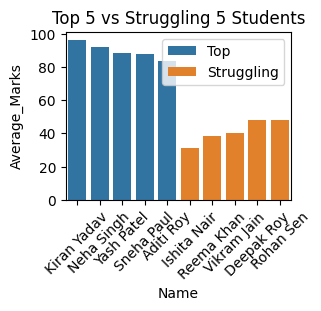

In [18]:
plt.subplot(2, 2, 1)
top_students = df.nlargest(5, "Average_Marks")
struggling_students = df.nsmallest(5, "Average_Marks")
bar_data = pd.concat([top_students, struggling_students])
bar_labels = ["Top"] * 5 + ["Struggling"] * 5
sns.barplot(x="Name", y="Average_Marks", hue=bar_labels, data=bar_data)
plt.title("Top 5 vs Struggling 5 Students")
plt.xticks(rotation=45)

# Plot 2: Correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

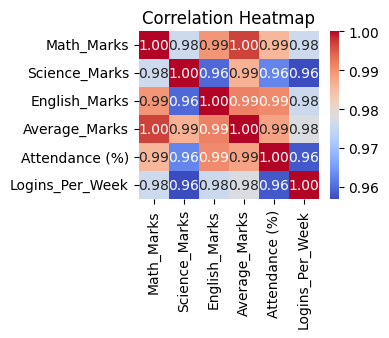

In [19]:
plt.subplot(2, 2, 2)
correlation_matrix = df[["Math_Marks", "Science_Marks", "English_Marks", "Average_Marks", "Attendance (%)", "Logins_Per_Week"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")


#  Attendance vs Average Marks

Text(0, 0.5, 'Average Marks')

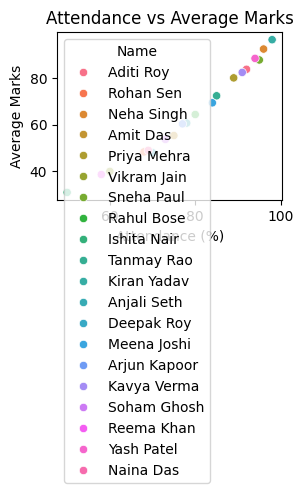

In [20]:
plt.subplot(2, 2, 3)
sns.scatterplot(x="Attendance (%)", y="Average_Marks", data=df, hue="Name")
plt.title("Attendance vs Average Marks")
plt.xlabel("Attendance (%)")
plt.ylabel("Average Marks")

 # Logins vs Average Marks

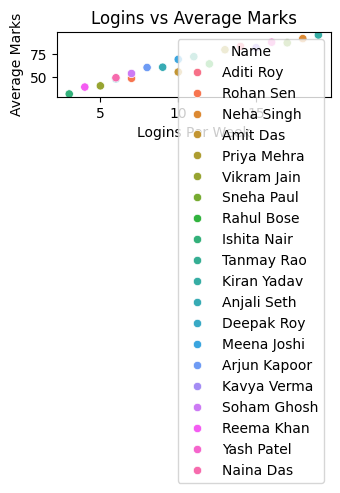

In [21]:
plt.subplot(2, 2, 4)
sns.scatterplot(x="Logins_Per_Week", y="Average_Marks", data=df, hue="Name")
plt.title("Logins vs Average Marks")
plt.xlabel("Logins Per Week")
plt.ylabel("Average Marks")

plt.tight_layout()
plt.savefig("student_analytics_dashboard.png")

#  Risk Identification

In [22]:
at_risk_students = df[
    (df["Average_Marks"] < 50) |
    (df["Attendance (%)"] < 70) |
    (df["Logins_Per_Week"] < 7)
]
at_risk_students.to_csv("at_risk_students.csv", index=False)


# Dashboard Summary (Console Output)